In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
lin_rec = LinearRegression()

lin_rec.fit(X,y)

LinearRegression()

In [12]:
regreciones = []
modelos     = []
for i in range(2,5):
    poly_reg = PolynomialFeatures(degree = i)
    modelos.append(poly_reg)
    x_poly   = poly_reg.fit_transform(X)
    lin_rec2 = LinearRegression()
    lin_rec2.fit(x_poly,y)
    regreciones.append(lin_rec2)

In [13]:
regreciones

[LinearRegression(), LinearRegression(), LinearRegression()]

In [14]:
modelos

[PolynomialFeatures(),
 PolynomialFeatures(degree=3),
 PolynomialFeatures(degree=4)]

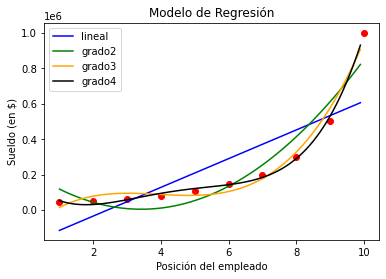

In [15]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_rec.predict(X_grid), color = "blue", label="lineal")

for r,m,c,l in zip(regreciones,modelos,
                 ["green","orange","black"],
                 ["grado2","grado3","grado4"]):
    plt.plot(X_grid, r.predict(m.fit_transform(X_grid)), 
         color = c,
         label = l)

plt.title("Modelo de Regresión")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.legend()
plt.show()